# FINAL PROJECT REPORT - DSCI 100

#### Predicting number of played hours on a MineCraft server based on player experience level, gender, and age.

##### Ella Zhang, Niloo Nasiri Faskhodi, Thavishi Pratap, Govind Venkat Narayanan

## Introduction:
Video games generate a lot of information about how players behave. The UBC Computer Science research group led by Frank Wood is running a special Minecraft research server to study these behaviours. Every time a player joins the server, their actions and play sessions are recorded. In this project, we wants to use this data to understand players better and also to improve how they can run the server in a more efficient way.

Our project focuses on the question:
* Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. 

This question is very meaningful because players who play longer create more data, which is helpful for the research group. If we can predict which players will have longer playtime, the team can focus their efforts on those types of players and generate more useful data.

The specific question that we're hoping to answer is as follows:

**Can age, gender, and experience level predict the total number of hours a player plays on the MineCraft server using the players dataset?**

To answer this question, we used the dataset: players.csv

The players dataset contains 196 unique players. Each row represents one player and includes their basic information and their overall gameplay history. The dataset has 7 variables: 

* experience (categorical): How familiar the player is with Minecraft (“Beginner”, “Intermediate”, “Expert”, "Pro", "Regular").

* subscribe (TRUE/FALSE): Whether the player signed up for the game-related newsletter.

* hashedEmail (string): An ID for each player.

* played_hours (numeric): The total number of hours the player has spent on the server across all sessions.

* name (string): Players' usernames.

* gender (categorical): Player’s gender.

* Age (numeric, mostly complete): Player’s age in years.(2 missing values)

In this report, we will show how we tidied and wrangled the data, built and choose our model, and analyzed the results to understand what types of players tend to play more on the server.

## Methods
#### 1. Tidying and wrangling the data

First, we imported all necessary libraries necessary for data analysis, and read our data from a URL that was linked to our GitHub repository.


Then, we tidied the data so we could use it for our data analysis when building prediction models for the data. We ensured that our final data table satisfied the requirements of tidy data: each row is a single observation, each column is a single variable, and each value is a single cell. We also ensured that the final data set only included the variables we wanted to look at when we wanted to build our model. This included removing variables/columns such as `hashedEmail`, `name`, and `subscribe`.

Afterwards, we made visualizations showcasing the relationship between each of our independent variables (`Age`, `gender`, and `experience`) with our dependent variable (`played_hours`) to better understand whether there even was a detectable relationship between the variables we would be creating a regression model with.

#### 2. Building regression models for the data

After gaining a better understanding of the relationships between our variables and tidying our data, we were ready to create a prediciton model. Since we're planning to predict a numerical value, we chose to build a regression model rather than a classification model. Prior to starting our data analysis here, we were unsure as to which model would be a better: KNN or linear regression.

To determine which model was better, we have to consider the relationship between some of the variables.

CHANGE ALL OF THE BOTTOM


we decided to use both models and apply them onto our testing data to see which model had a lower RMSPE (root mean square prediction error). A smaller RMSPE value would indicate that the model made fewer errors in the sense that the model's predictions were closer in distance to the real values.

First, we set a seed to ensure that our data is reproducible and that R splits the data the same way randomly everytime our code is run. Then, we decided to split our tidy data and into a training and testing set. We would first train and tune our models with our training set and then apply the model on the testing set to evaluate its performance.

## Data Analysis

First, we import all necessary libraries for our data analysis.

In [58]:
#loading the library
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(ggplot2)
library(RColorBrewer)
#import glue library to connect variables with characters in a print statement
library(glue)

Now, we load our data using a URL from our GitHub repository, so it's accessible for anyone to load. We use `read_csv` to read the non-wrangled data.

In [59]:
players_data <- read_csv("https://raw.githubusercontent.com/thaviship/dsci-group-project/refs/heads/main/players.csv")
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


To tidy our data, we will only select our necessary variables to answer our question: `experience`, `gender`, `Age`, and `played_hours`. We decided to remove players who had 0 hours of gameplay as they would not contribute to the data whatsoever. All NA values associated with `Age` were also removed to ensure that all data points we have could be used for our model building later. We also created a standardized scale with the `played_hours` using logarithms.

In [60]:
#tidy data
players_tidy <- players_data |> 

# Select out the hashedEmail and name column vectors as they are identifiers and contain no predictive information.
                select(-hashedEmail, -name, -subscribe) |> 

#Convert subscribe, experience, and gender character variables to factor variables so that R can treat them as categorical variables.
  #mutate(subscribe_fct=as_factor(subscribe)) |> 
  mutate(experience_fct=as_factor(experience)) |>
  mutate(gender_fct=as_factor(gender)) |>

#Filter out the played_hours variable and select only those who have >0 gameplay hours. Zero-hour players are non-contributors and do not contribute to the goal of identifying high-engagement users.
                filter(played_hours>0) |> 

#Remove rows with missing Age, as leaving NA values leads to loss of rows silently and inconsistencies in model prediction.
         filter(!is.na(Age)) |>   

#To deal with extreme outliers in played_hours, transform highly skewed values into log as it compresses the large values, which makes the distribution closer to normal and stabilizes variance. 
         mutate(played_hours_log = log(played_hours + 1))
               

#remove non fct columns to prevent multicollinearlity when performing multivariable linear regression and to ease visualisation of the dataset.

players_clean<- players_tidy |> drop_na(played_hours_log, experience_fct, gender_fct, Age) |> select(experience_fct, gender_fct, Age, played_hours_log)

head(players_clean)

experience_fct,gender_fct,Age,played_hours_log
<fct>,<fct>,<dbl>,<dbl>
Pro,Male,9,3.44361810
Veteran,Male,17,1.56861592
Amateur,Female,21,0.53062825
Regular,Male,21,0.09531018
Amateur,Male,47,0.09531018
Veteran,Female,23,0.95551145


Below, the total number of hours played is graphed against the experience level of the players. The sum of hours played of each experience category was taken to produce the graph.

experience_fct,total_hours
<fct>,<dbl>
Pro,7.590369
Veteran,13.301916
Amateur,36.530174
Regular,27.261411
Beginner,14.002397


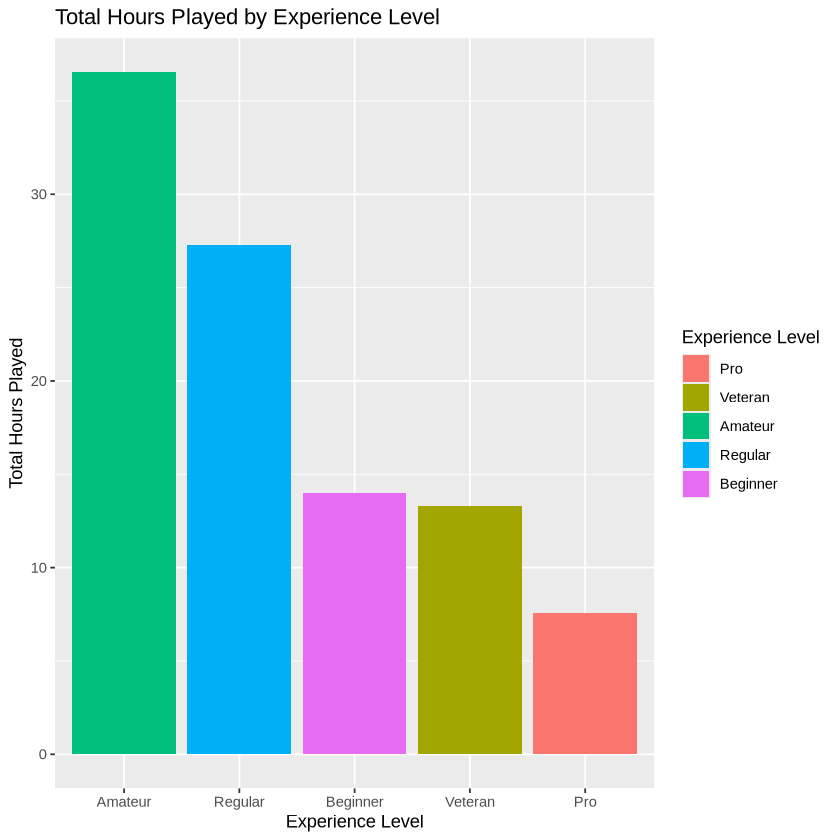

In [61]:
bar_plot_tidy_players <- players_clean |>
  group_by(experience_fct) |>
  summarise(total_hours = sum(played_hours_log), .groups = "drop")
bar_plot_tidy_players

bar_plot_experience_vs_totalhrs <- bar_plot_tidy_players |> 
  ggplot(aes(x = fct_reorder(experience_fct, total_hours, .desc=TRUE),
             y = total_hours,
             fill = experience_fct)) +
  geom_bar(stat = "identity") +
  labs(x = "Experience Level", 
       y = "Total Hours Played", 
       fill = "Experience Level",title = "Total Hours Played by Experience Level")

bar_plot_experience_vs_totalhrs

Next, we wanted to see the relationship between the age of players alongside their experience level and the quantity of these groups of people.

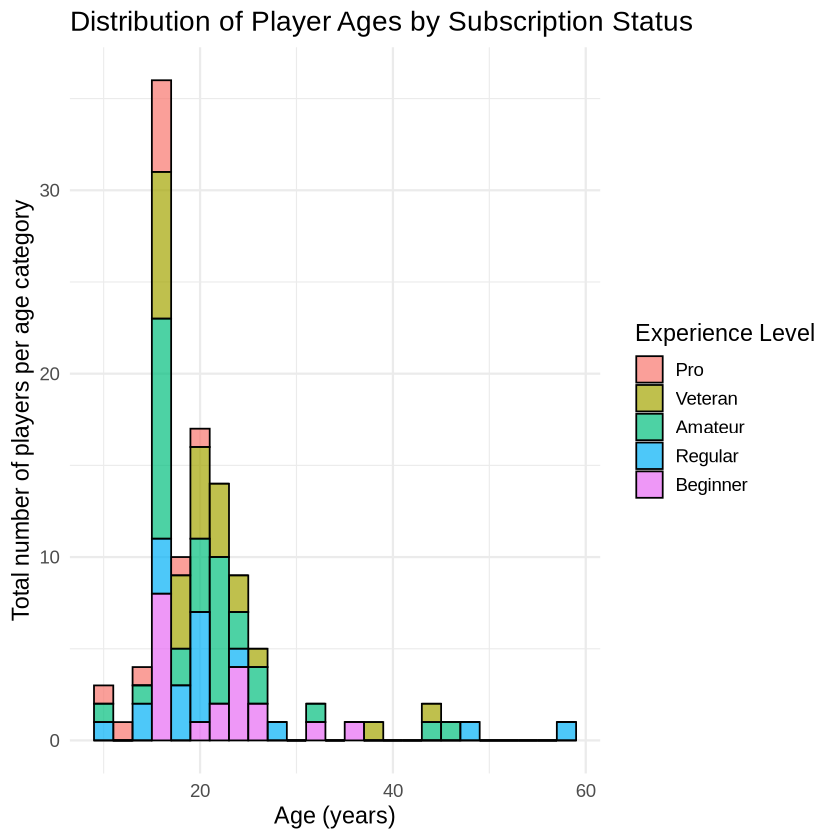

In [54]:
players_age_hours_hist <- players_clean |> 
   ggplot(aes(x = Age, fill = experience_fct)) +
  geom_histogram(binwidth = 2,color="black", alpha=0.7) +
  labs(
    title = "Distribution of Player Ages by Subscription Status",
    x = "Age (years)",
    y = "Total number of players per age category",
    fill = "Experience Level"
  ) +
  theme_minimal(base_size = 14) 
  
players_age_hours_hist

Below, the sum of played hours based on gender was calculated, which was followed by finding the distribution of played hours depending on the gender.

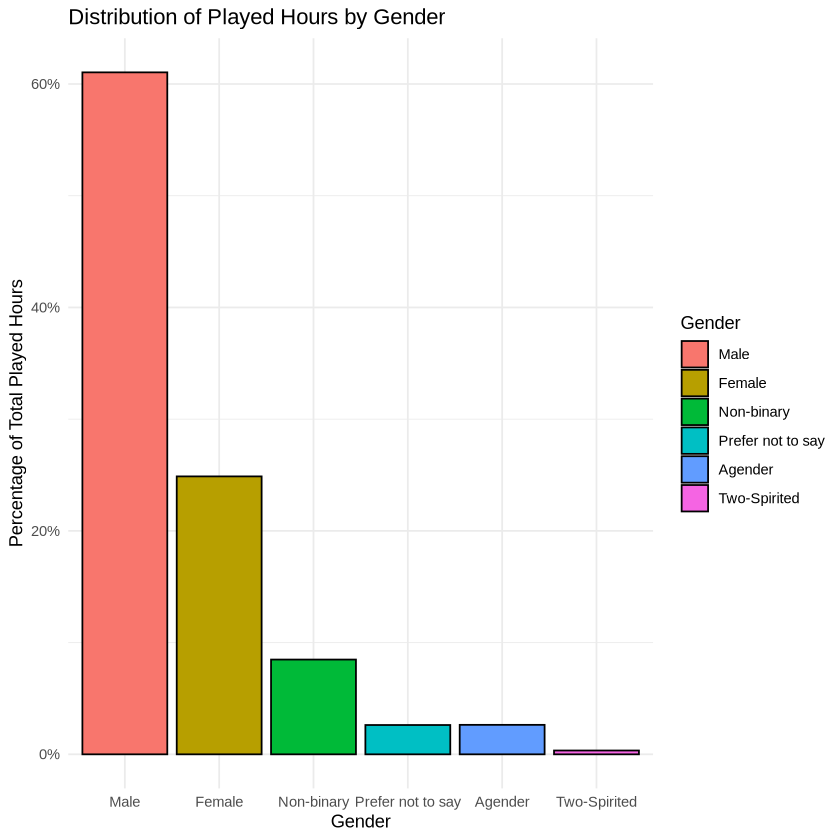

In [55]:
 plot_data <- players_clean |>
  group_by(gender_fct) |> 
  summarise(total_hours = sum(played_hours_log), .groups = "drop") |>
  mutate(percentage = total_hours / sum(total_hours))

experience_gender_percent_plot_fct <- ggplot(plot_data,
                                             aes(x = gender_fct,
                                                 y = percentage, fill=gender_fct)) +
  geom_bar(stat = "identity", colour = "black") +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(
    x = "Gender",
    y = "Percentage of Total Played Hours",
    title = "Distribution of Played Hours by Gender",
  fill="Gender") +
  theme_minimal()

experience_gender_percent_plot_fct


### Making a prediction model

#### Predicting played hours based on experience level, age, and gender

In [63]:
options(repr.matrix.max.rows = 6)
players_clean

experience_fct,gender_fct,Age,played_hours_log
<fct>,<fct>,<dbl>,<dbl>
Pro,Male,9,3.4436181
Veteran,Male,17,1.5686159
Amateur,Female,21,0.5306283
⋮,⋮,⋮,⋮
Veteran,Female,44,0.09531018
Veteran,Male,22,0.26236426
Amateur,Male,17,1.19392247


#### 1. Attempting a KNN regression model

In [28]:
#setting the seed
set.seed(1234)

#splitting the data into a training and testing set; a 75% proportion ratio will be used for the training data
players_split <- initial_split(players_clean, prop = 0.75, strata = played_hours_log)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [29]:
#make a recipe for preprocessing the data; scale and center the data
players_recipe <- recipe(played_hours_log ~ experience_fct + Age + gender_fct, data = players_training) |>
    step_dummy(all_nominal_predictors()) |>
    step_zv(all_predictors()) |>
    step_scale(all_numeric_predictors()) |>
    step_center(all_numeric_predictors())

#make a knn model, where the best k value is found
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

#conduct cross validation where there are 5 folds
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours_log)

#create a workflow
players_wkflw <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)
players_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_dummy()
• step_zv()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [62]:
#run cross validation and determine the best k value for the training data set
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))
players_results <- players_wkflw |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")
k_min <- players_results |>
    filter(mean == min(mean)) |>
    pull(neighbors)
k_min
#k value with lowest rmspe value is k = 15

[1] 15

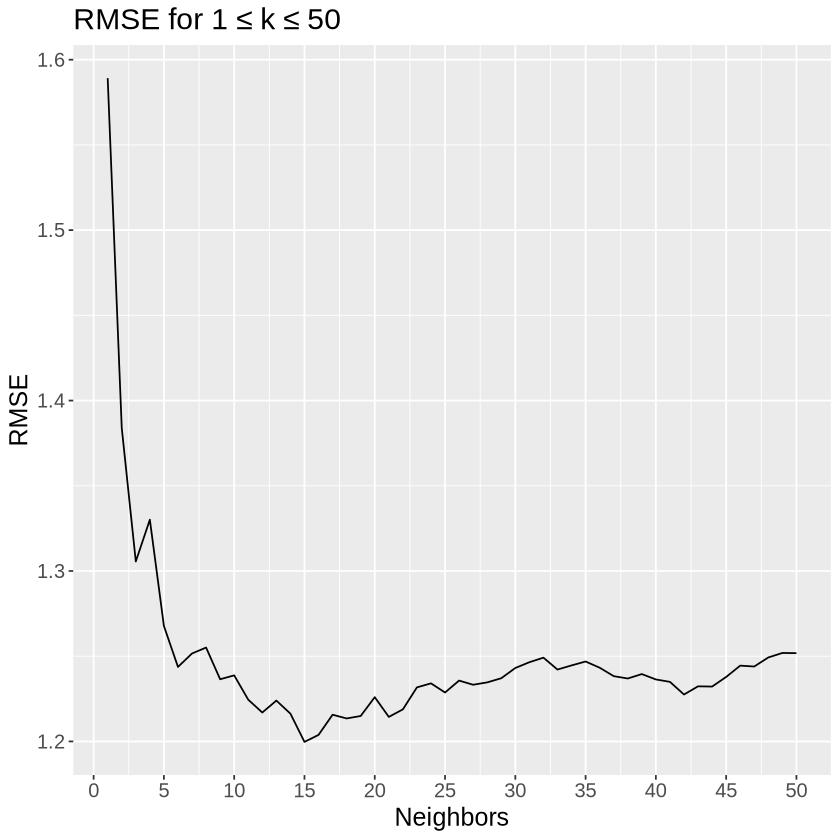

In [43]:
rmse_versus_k <- ggplot(players_results, aes(x = neighbors, y = mean)) +
    geom_line() +
    labs(x = "Neighbors", y = "RMSE", title = "RMSE for 1 ≤ k ≤ 50") +
    scale_x_continuous(breaks = seq(from = 0, to = 50, by = 5)) +
    theme(text = element_text(size = 15))
rmse_versus_k

In [45]:
#apply this k value to the testing set
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")
players_spec

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

players_predictions <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

players_summary <- players_predictions|>
    metrics(truth = played_hours_log, estimate = .pred) |>
    filter(.metric == "rmse")
players_summary

print(glue("The RMSPE value using a KNN regression model is {players_summary |> pull(.estimate)}"))

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = k_min
  weight_func = rectangular

Computational engine: kknn 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.193013


The RMSPE value using a KNN regression model is 1.19301254076637


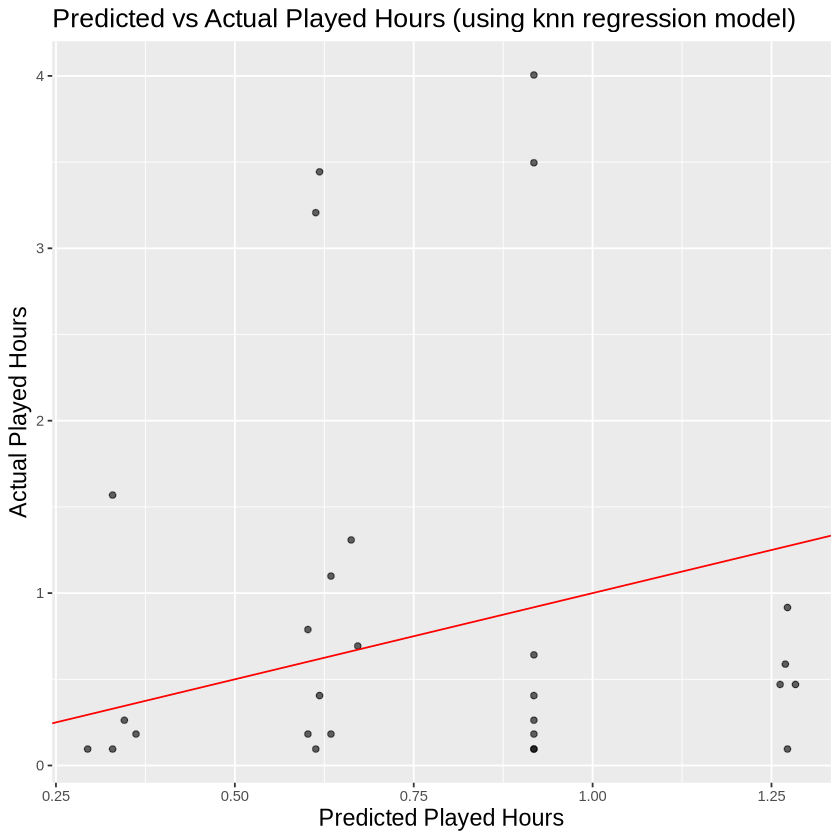

In [32]:
knn_visualization <- ggplot(players_predictions, aes(x = .pred, y = played_hours_log)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Predicted vs Actual Played Hours",
       x = "Predicted Played Hours",
       y = "Actual Played Hours")+
    theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 14))+
        ggtitle("Predicted vs Actual Played Hours (using knn regression model)")
knn_visualization 

#### 2. Attempting a linear regression using the same split used in KNN

In [33]:
# Create model specification + recipe + fit multivariable linear regression model
players_lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")
players_lm_recipe <- recipe(played_hours_log ~ experience_fct + Age + gender_fct, data = players_training) |>
    step_dummy(all_nominal_predictors())
players_lm_fit <- workflow() |>
    add_recipe(players_lm_recipe) |>
    add_model(players_lm_spec) |>
    fit(data = players_training)
players_lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
                 (Intercept)                           Age  
                     0.79470                      -0.01885  
      experience_fct_Veteran        experience_fct_Amateur  
                    -0.22168                       0.47923  
      experience_fct_Regular       experience_fct_Beginner  
                     1.20575                      -0.04370  
           gender_fct_Female         gender_fct_Non.binary  
                     0.61785                       0.74536  
gender_fct_Prefer.not.to.say            gender_fct_Agender  
                    -0.27035                       2.53852  
     gende

In [34]:
lm_predictions <- players_lm_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

lm_test_results <- lm_predictions|>
    metrics(truth = played_hours_log, estimate = .pred) |>
    filter(.metric == "rmse")
print(glue("The RMSPE value using a linear regression model is {lm_test_results |> pull(.estimate)}"))

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


The RMSPE value using a linear regression model is 1.28704569140355


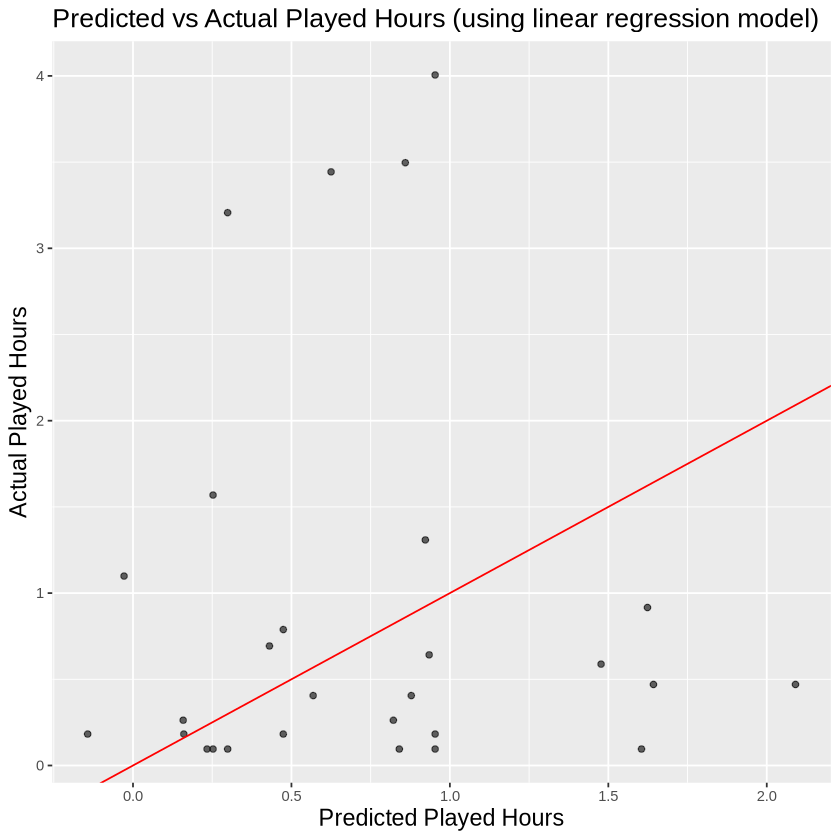

In [46]:
lm_visualization <- ggplot(lm_predictions, aes(x = .pred, y = played_hours_log)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Predicted vs Actual Played Hours",
       x = "Predicted Played Hours",
       y = "Actual Played Hours")+
    theme(plot.title = element_text(size = 16),
        axis.title = element_text(size = 14))+
        ggtitle("Predicted vs Actual Played Hours (using linear regression model)")
lm_visualization 

# Conclusion

KNN regression model fits the data better.